Import Libraries



In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('transaction_fraud_dataset.csv')

Checking missing values

In [3]:

print(df.isnull().sum())

transaction_amount         0
transaction_time           0
merchant_id                0
transaction_location       0
account_age                0
prior_fraud_involvement    0
ip_address                 0
is_fraud                   0
dtype: int64


Checking data types


In [4]:
print(df.dtypes)

transaction_amount         float64
transaction_time             int64
merchant_id                 object
transaction_location        object
account_age                  int64
prior_fraud_involvement      int64
ip_address                  object
is_fraud                     int64
dtype: object


Converting categorical into numerical data type

In [5]:
label_encoders = {}
for col in ['merchant_id', 'transaction_location', 'ip_address']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Checking new data types

In [6]:
print(df.dtypes)

transaction_amount         float64
transaction_time             int64
merchant_id                  int64
transaction_location         int64
account_age                  int64
prior_fraud_involvement      int64
ip_address                   int64
is_fraud                     int64
dtype: object


Train Test Split

In [7]:
x = df.drop('is_fraud', axis=1)
y = df['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40, stratify=y)

Checking the size of training and testing data

In [8]:
print(x_train.shape, x_test.shape)

(400, 7) (100, 7)


Training the Model

In [9]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

Testing and measuring the accuracy

In [10]:
y_predicted = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
print(classification_report(y_test, y_predicted))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Visualizing the Decision Tree

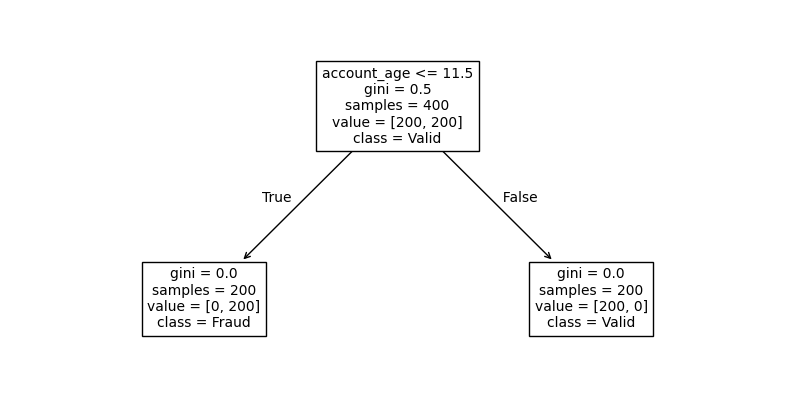

In [11]:

plt.figure(figsize=(10,5)) 
plot_tree(dtree,feature_names=x.columns, class_names=['Valid', 'Fraud'], fontsize=10)
plt.show() 


Testing model on new made-up data

Example of Valid Transaction

In [12]:
new_data = {
    'transaction_amount': [8677.052225],     
    'transaction_time': [6],          
    'merchant_id': ['M035'],           
    'transaction_location': ['Mumbai'],
    'account_age': [89],
    'prior_fraud_involvement': [0],
    'ip_address': ['116.96.164.243']     
}

new_df = pd.DataFrame(new_data)


for col in ['merchant_id', 'transaction_location', 'ip_address']:
    le = label_encoders[col]
    new_df[col] = le.fit_transform(new_df[col])

prediction = dtree.predict(new_df)
if prediction[0] == 1:
    print("Prediction: Fraud")
else:
    print("Prediction: Valid transaction")


Prediction: Valid transaction


Example of Fraud Transaction

In [13]:
new_data = {
    'transaction_amount': [60404.19513],     
    'transaction_time': [1],          
    'merchant_id': ['M050'],           
    'transaction_location': ['Bangalore'],
    'account_age': [7],
    'prior_fraud_involvement': [1],
    'ip_address': ['160.51.37.109']     
}

new_df = pd.DataFrame(new_data)


for col in ['merchant_id', 'transaction_location', 'ip_address']:
    le = label_encoders[col]
    new_df[col] = le.fit_transform(new_df[col])

prediction = dtree.predict(new_df)
if prediction[0] == 1:
    print("Prediction: Fraud")
else:
    print("Prediction: Valid transaction")


Prediction: Fraud
